<center><h1><strong>Universidad Nacional Autónoma de México</strong></h1></center><br>

<center>Computación</center>
<center><strong>Grupo:</strong> 8093</center><br>

<center><strong>Profesores:</strong></center>
<center>Sergio Antonio Alcalá Corona</center>
<center>Sergio Ángel Sánchez Chávez</center><br>

<center><strong><h3>Proyecto final: Un oscilador armónico</h3></strong></center><br>

<center>Chimal García Ernesto Andreo</center>
<center>Segura Moreno Rodrigo</center><br>

____

Con la finalidad de extender a una noción computacional y, explicar a mayor detalle el funcionamiento del código elaborado para la resolución y graficación de la ecuación diferencial a resolver, se redacta este cuaderno de Jupyter. Esperamos resulte, un marco referencial para el proyecto mismo.

Resulta importante enfatizar que el código explicado a continuación será un extracto del archivo **grafica_ec.py** el cual se encuentra en el este mismo <a href="https://github.com/ro-sgr/cautious-parakeet" target="_blank">repositorio</a>. Será únicamente un extracto del código relevante para entender "por bloques" la solución a la ecuación diferencial, así como las graficaciones pertinentes.

*Nota:* Aspectos relaciondos con la interfaz de usuario desarrollada en el archivo **grafica_ec.py** no serán abordados en este cuaderno. Si desea saber más al respecto, puede consultar los comentarios anidados en el código de este último archivo.

Sin más, demos paso a la explicación del código.

___

<strong><h3>Sección 1.</h3></strong>
<h4>Graficación en "tiempo real"</h4><br>

En este apartado, primeramente explicaremos el código para realizar dos gráficas:
   - Comportamiento del oscilador armónico
   - Vista "aérea" de la espira

Los cuadernos de jupyter, lamentablemente, no son capaces de realizar gráficas en tiempo real por el momento (al menos, el las computadoras usadas para la elaboración de este proyecto no fue posible). Por cuestiones didacticas, generaremos tres gráficas distintas en momentos diferentes de tiempo para apreciar el cambio del oscilador respecto al tiempo.

Si desea observar la graficación en tiempo real, por favor consulte el <a href="#" target="_blank">script</a>.

In [1]:
# Importamos las librerías con las cuales se trabajará
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<a href="#" target="_blank">Recuerde</a> que la ecuación diferencial que buscamos darle una solución numérica es:
    
$$ \ddot{\theta} = -\frac{(AB)^2}{RI}\cos^2\theta\, \dot{\theta} - \frac{k}{I}\theta $$

In [2]:
# Generamos una función que resuelva numéricamente la aceleración angular
def calcular_thetadpt(ang, vel):
    ac_ang = (- k * ang )/I - (((A*B)**2)* ((np.cos(ang)) ** 2) * vel) / (R*I) # Cálculo de la aceleración angular según la ecuación diferencial
    return ac_ang

In [3]:
# Iteramos "calcular_thetadpt" para generar valores a las listas de TIEMPO y THETA
def f(tiempo):
    THETA = []
    # Valores iniciales
    theta = 1.
    thetapt = 0.
    dt = 0.01 # Paso

    for i in np.arange(0,tiempo,dt):
        TIEMPO.append(i) # Se adjunta el segundo a una lista

        thetadpt = calcular_thetadpt(theta, thetapt) # Se calcula la aceleración angular según las variables
        thetapt += thetadpt * dt # Como thetapt = d/dt (thetapt), theta_f = thetapt_i + thetadpt * dt, aprox
        theta += thetapt * dt # Como thetapt = d/dt (theta), theta_f = thetapt_i + thetadpt * dt, aprox
        THETA.append(theta)

    return THETA

<h4><strong>Gráfica 1.</strong> Oscilador armónico</h4>

In [4]:
# Establecemos las condiciones iniciales del sistema
k = 10.4 # Constante del resorte de torsión
A = 1.09 # Área de la espira
B = 1.21 # Intensidad de campo magnético
R = 1.09 # Resistencia de la espira
I = 1.42 # Momento de incercia de la espira

In [5]:
# Generamos los valores en "y" para diferentes intervalos y los almacenamos

TIEMPO = []
y1 = f(3.33)
TIEMPO1 = TIEMPO

TIEMPO = []
y2 = f(6.66)
TIEMPO2 = TIEMPO

TIEMPO = []
y3 = f(9.99)
TIEMPO3 = TIEMPO

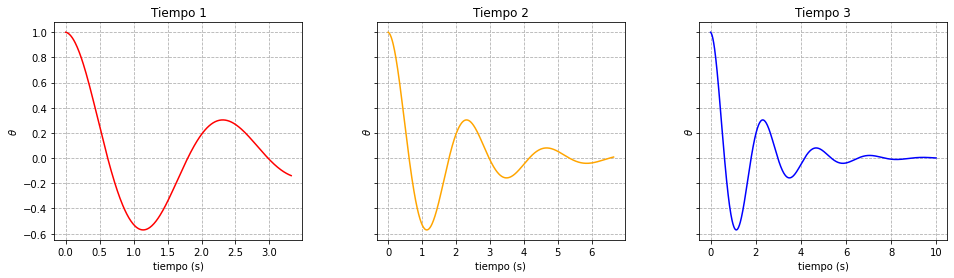

In [6]:
# Generamos una figura para nuestras tres gráficas
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharey=True)

# Gráfica 1
ax1.set_title('Tiempo 1')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel(r'$\theta$')
ax1.plot(TIEMPO1, y1, label='y1', color='red') # Valores que toma la gráfica
ax1.grid(linestyle = "--")

# Gráfica 2
ax2.set_title('Tiempo 2')
ax2.set_xlabel('tiempo (s)')
ax2.set_ylabel(r'$\theta$')
ax2.plot(TIEMPO2, y2, label='y1', color='orange') # Valores que toma la gráfica
ax2.grid(linestyle = "--")

# Gráfica 3
ax3.set_title('Tiempo 3')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel(r'$\theta$')
ax3.plot(TIEMPO3, y3, label='y1', color='blue') # Valores que toma la gráfica
ax3.grid(linestyle = "--")

plt.subplots_adjust(wspace=0.3)
plt.show()

<h4><strong>Gráfica 2.</strong> Espira</h4>

In [7]:
x = [0,0]
y = [0,0]

In [8]:
# Esta función genera nuestra visualización superior de la espira
def espira(i):
    # Se definen las coordenadas de los extremos
    x1 = np.cos(f(i))
    y1 = np.sin(f(i))
    x2 = -np.cos(f(i))
    y2 = -np.sin(f(i))

    # Se alteran las entradas de las listas que definen los extremos de acuerdo a los valores recién calculados
    x[0] = x1
    y[0] = y1
    x[1] = x2
    y[1] = y2

    return x,y

In [9]:
# Generamos una lista de valores para un intervalo de 1 segundo
espira(1);

In [10]:
# Valores de la primer gráfica
valores_x1 = [x[0][0], x[1][0]]
valores_y1 = [y[0][0], y[1][0]]

# Valores de la segunda gráfica
valores_x2 = [x[0][30], x[1][30]]
valores_y2 = [y[0][30], y[1][30]]

# Valores de la tercer gráfica
valores_x3 = [x[0][60], x[1][60]]
valores_y3 = [y[0][60], y[1][60]]

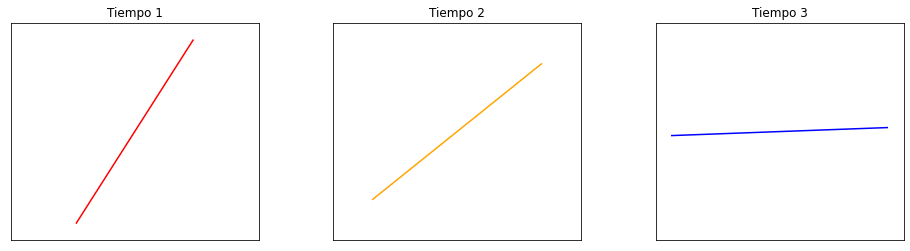

In [11]:
# Generamos una figura para nuestras tres gráficas
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4), sharey=True)

# Gráfica 1
ax1.set_title('Tiempo 1')
ax1.set_ylabel(r'$\theta$')
ax1.set_xlim([-1.15,1.15])
ax1.set_ylim([-1,1])
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.plot(valores_x1, valores_y1, label='y1', color='red') # Valores que toma la gráfica

# Gráfica 2
ax2.set_title('Tiempo 2')
ax2.set_ylabel(r'$\theta$')
ax2.set_xlim([-1.15,1.15])
ax2.set_ylim([-1,1])
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.plot(valores_x2, valores_y2, label='y2', color='orange') # Valores que toma la gráfica

# Gráfica 3
ax3.set_title('Tiempo 3')
ax3.set_ylabel(r'$\theta$')
ax3.set_xlim([-1.15,1.15])
ax3.set_ylim([-1,1])
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.plot(valores_x3, valores_y3, label='y3', color='blue') # Valores que toma la gráfica

plt.subplots_adjust(wspace=0.3)
plt.show()

___
<br>

<strong><h3>Sección 2.</h3></strong>
<h4>Graficación, mover parámetros</h4><br>

En este apartado, se explicará el código 

Los cuadernos de jupyter, lamentablemente, no son capaces de realizar gráficas en tiempo real por el momento (al menos, el las computadoras usadas para la elaboración de este proyecto no fue posible). Por cuestiones didacticas, generaremos tres gráficas distintas en momentos diferentes de tiempo para apreciar el cambio del oscilador respecto al tiempo.

Si desea observar la graficación en tiempo real, por favor consulte el <a href="#" target="_blank">script</a>.